# Data Cleaning



## Games Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
import re
import string
from bs4 import BeautifulSoup
import datetime as dt
import os
import joblib

# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)

In [2]:
gamedf = pd.read_csv('data/steam_game_data.csv')

In [3]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109021 entries, 0 to 109020
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     93839 non-null   object 
 1   name                     109013 non-null  object 
 2   steam_appid              109021 non-null  int64  
 3   required_age             93839 non-null   float64
 4   is_free                  93839 non-null   object 
 5   controller_support       25676 non-null   object 
 6   dlc                      7651 non-null    object 
 7   detailed_description     85990 non-null   object 
 8   about_the_game           85988 non-null   object 
 9   short_description        90602 non-null   object 
 10  fullgame                 39760 non-null   object 
 11  supported_languages      90329 non-null   object 
 12  header_image             93839 non-null   object 
 13  website                  56233 non-null   object 
 14  pc_r

In [4]:
gamedf.duplicated().sum()

213

In [5]:
gamedf.drop_duplicates(keep='first', inplace=True)
gamedf.reset_index(drop=True, inplace=True)

In [6]:
gamedf.shape

(108808, 39)

In [7]:
#drop unnecessary cols
gamedf.drop(columns = ['fullgame', 'header_image', 'website', 'legal_notice', 
                       'drm_notice', 'ext_user_account_notice', 'screenshots', 'movies',
                      'support_info', 'background', 'pc_requirements',  'mac_requirements', 
                       'linux_requirements','packages', 'package_groups', 'content_descriptors'], inplace=True)


In [8]:
gamedf.head(10)

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,price_overview,platforms,metacritic,reviews,categories,genres,recommendations,achievements,release_date
0,NaN,Dedicated Server,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Steam Client,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,winui2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,"English<strong>*</strong>, French<strong>*</st...",['Valve'],['Valve'],NaN,"{'currency': 'EUR', 'initial': 819, 'final': 8...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 101815},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}"
4,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],NaN,"{'currency': 'EUR', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 3833},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}"
5,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,"English, French, German, Italian, Spanish - Spain",['Valve'],['Valve'],NaN,"{'currency': 'EUR', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 2821},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}"
6,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],NaN,"{'currency': 'EUR', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 1306},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}"
7,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,"English, French, German, Korean",['Gearbox Software'],['Valve'],NaN,"{'currency': 'EUR', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",{'total': 8575},NaN,"{'coming_soon': False, 'date': '1 Nov, 1999'}"
8,game,Ricochet,60,0.0,False,NaN,NaN,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,"English, French, German, Italian, Spanish - Sp...",['Valve'],['Valve'],NaN,"{'currency': 'EUR', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 2703},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}"
9,game,Half-Life,70,0.0,False,NaN,[323130],Named Game of the Year by over 50 publications...

In [9]:
gamedf.type.unique()

array([nan, 'game', 'advertising', 'demo', 'movie', 'mod', 'dlc', 'music',
       'video', 'series', 'episode', 'hardware'], dtype=object)

In [10]:
#drop all types apart from game and dlc

In [11]:
keep = ['game', 'dlc']

gamedf = gamedf[gamedf.type.isin(keep)]
gamedf.reset_index(drop=True, inplace=True)

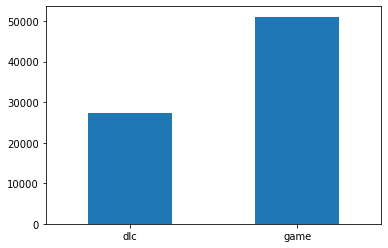

In [12]:
gamedf.type.value_counts(sort=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [13]:
#checking % of nulls in a column
gamedf.isna().sum()/len(gamedf)*100 

type                     0.000000
name                     0.007654
steam_appid              0.000000
required_age             0.000000
is_free                  0.000000
controller_support      76.615856
dlc                     90.311882
detailed_description     0.362268
about_the_game           0.362268
short_description        0.358441
supported_languages      0.454111
developers               0.636520
publishers               0.000000
demos                   94.300657
price_overview          20.677339
platforms                0.000000
metacritic              95.351744
reviews                 89.753173
categories               1.325340
genres                   0.526819
recommendations         86.158556
achievements            69.031188
release_date             0.000000
dtype: float64

### Checking nan cols

Upon inspection of the rows with missing values in the name and description columns I found a lot of these are games which have been delisted from the website or are games yet to be released so I dropped these

In [14]:
gamedf[gamedf.name.isna()]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,price_overview,platforms,metacritic,reviews,categories,genres,recommendations,achievements,release_date
12267,game,NaN,396420,0.0,True,NaN,NaN,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。<b...,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。<b...,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。 村...,NaN,NaN,[''],NaN,NaN,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,NaN,NaN,NaN,NaN,"{'coming_soon': False, 'date': '1 Nov, 2016'}"
17723,dlc,NaN,495790,0.0,False,NaN,NaN,NaN,NaN,NaN,English<strong>*</strong><br><strong>*</strong...,NaN,[''],NaN,NaN,"{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...",NaN,NaN,"{'coming_soon': False, 'date': '5 Jul, 2016'}"
48333,game,NaN,1001520,0.0,False,NaN,NaN,"Mastering flight, air-maneuvers and overcoming...","Mastering flight, air-maneuvers and overcoming...",Space flight arcade focused on maneuvering.,NaN,NaN,[''],NaN,NaN,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,NaN,NaN,NaN,NaN,"{'coming_soon': True, 'date': '1 Jun, 2021'}"
52922,game,NaN,1074060,0.0,True,NaN,NaN,Imagine you were a cube and you had to fight w...,Imagine you were a cube and you had to fight w...,Fight against weird purple objects with no end...,English<strong>*</strong><br><strong>*</strong...,NaN,[''],NaN,NaN,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,"{'coming_soon': True, 'date': '2020 Q3'}"
53347,game,NaN,1080690,0.0,False,NaN,NaN,NaN,NaN,NaN,English,NaN,[''],NaN,NaN,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...",NaN,NaN,"{'coming_soon': True, 'date': 'Sep 2019'}"
62713,game,NaN,1219280,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[''],NaN,NaN,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,NaN,NaN,NaN,NaN,"{'coming_soon': True, 'date': 'Coming Soon'}"


In [15]:
gamedf = gamedf[~gamedf.name.isna()]

In [16]:
gamedf.shape

(78389, 23)

In [17]:
#drop rows with no detailed_description
gamedf = gamedf[~gamedf.detailed_description.isna()]

Turn demos and controller column into a boolean - 1 if exists, 0 if not

In [18]:
gamedf.demos = np.where(gamedf.demos.isnull(), 0, 1)

In [19]:
gamedf.demos.value_counts()

0    73643
1     4465
Name: demos, dtype: int64

In [20]:
gamedf.controller_support.value_counts()

full    18307
Name: controller_support, dtype: int64

In [21]:
gamedf['controller_support']=gamedf['controller_support'].apply(lambda x: 1 if x=='full' else 0)

In [22]:
#convert columns
gamedf.is_free = gamedf.is_free.astype(int)

### Extract out columns with lists as these are actually strings - eg "['']"

In [23]:
string_cols = ['dlc', 'categories', 'genres', 'developers', 'publishers']

for col in string_cols:
    gamedf[col].fillna('[]', inplace=True)
    gamedf[col] = gamedf[col].apply(lambda x: literal_eval(str(x)))
    gamedf[col] = gamedf[col].apply(lambda x: np.nan if (type(x) == list and len(x) == 0) else x)
    gamedf[col] = gamedf[col].apply(lambda x: np.nan if x == [''] else x)

### Separate out dict columns into separate columns

In [24]:
gamedf.reset_index(drop=True, inplace=True)

In [25]:
col_dict = ['price_overview', 'platforms', 'metacritic', 'recommendations', 
            'achievements', 'release_date']

dfs = []
for column in gamedf[col_dict]:
    gamedf[column] = gamedf[column].fillna('{}')
    try:
        df_column = pd.json_normalize(gamedf[column].apply(eval))
    except AttributeError:
        df_column = gamedf[column].copy()

    dfs.append(df_column)

    df = pd.concat(dfs, axis=1)


In [26]:
#renaming columns for clarity
df.columns = ['currency', 'init_price', 'final_price', 'discount_pct', 'initial_curr', 'final_curr', 
              'recurring_sub', 'recurring_sub_desc', 'windows', 'mac', 'linux', 'meta_score', 'meta_url', 
              'recommendations', 'achiev_total', 'achiev_highlighted', 'coming_soon', 'rel_date']

Dropping unneccessary columns after expanding dict columns also only 34 games with recurring subscriptions so decided to remove this too

In [27]:
df.drop(columns=['meta_url','recurring_sub', 'recurring_sub_desc', 'initial_curr', 
                 'final_curr', 'achiev_highlighted'], inplace=True)

Adding expanded columns back into original dataframe

In [28]:
gamedf = pd.concat([gamedf, df], axis=1)

In [29]:
gamedf.drop(columns=col_dict, inplace=True)

In [30]:
gamedf.reset_index(drop=True, inplace=True)

DLC col has 90% nans but we want to take a look at them later - we have almost 30k DLCs listed and these will have nans in the DLC column so replaced with 0

In [31]:
gamedf.fillna({'dlc':0,'reviews':0}, inplace=True)

In [32]:
gamedf[gamedf.developers.isnull() & gamedf.publishers.isnull()]
#inspecting rows which contain nans in both, drop these rows which contain nans in both

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
353,game,Grand Theft Auto: San Andreas,12250,0.0,0,0,0,Hace cinco años Carl Johnson huyó de los rigor...,Hace cinco años Carl Johnson huyó de los rigor...,Hace cinco años Carl Johnson huyó de los rigor...,NaN,NaN,NaN,0,0,"[{'id': 18, 'description': 'Partial Controller...",NaN,NaN,NaN,NaN,NaN,True,False,False,93.0,NaN,False,
1632,game,Guardians of Graxia,90500,0.0,0,0,0,Guardians of Graxia takes on the form of a car...,Guardians of Graxia takes on the form of a car...,Guardians of Graxia takes on the form of a car...,English,NaN,NaN,1,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '2', 'description': 'Strategy'}]",NaN,NaN,NaN,NaN,True,False,False,NaN,14.0,False,"1 Nov, 2010"
1634,dlc,Guardians of Graxia: Elves & Dwarves,90504,0.0,0,0,0,In this first major expansion for Guardians of...,In this first major expansion for Guardians of...,In this first major expansion for Guardians of...,English,NaN,NaN,0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '2', 'description': 'Strategy'}]",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,False,"1 Feb, 2011"
2767,dlc,BIT.TRIP Presents... Runner2: Future Legend of...,218064,0.0,0,0,0,BIT.TRIP Presents... Runner2: Future Legend of...,BIT.TRIP Presents... Runner2: Future Legend of...,BIT.TRIP Presents... Runner2: Future Legend of...,NaN,NaN,NaN,0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,GBP,699.0,279.0,60.0,True,True,True,NaN,NaN,False,"26 Feb, 2013"
2784,game,Patterns,218980,0.0,0,0,0,Create worlds beyond your imagination in Patte...,Create worlds beyond your imagination in Patte...,Create worlds beyond your imagination in Patte...,English,NaN,NaN,0,&quot;...a promising new take on the genre&quo...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '4', 'description': 'Casual'}, {'id': ...",NaN,NaN,NaN,NaN,True,True,False,NaN,NaN,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68033,dlc,Titanfall™ 2: Purple Fade G2A5,1316275,0.0,0,0,0,Customised warpaints deck out your favorite we...,Customised warpaints deck out your favorite we...,"Deep in The Frontier, Pilot and Titan must wor...",NaN,NaN,NaN,0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,EUR,499.0,499.0,0.0,True,False,False,NaN,NaN,False,"18 Jun, 2020"
68386,dlc,Need for Speed™ Payback: MINI John Cooper Work...,1328030,0.0,0,0,0,Need for Speed™ Payback: MINI John Cooper Work...,Need for Speed™ Payback: MINI John Cooper Work...,MINI John Cooper Works Countryman &amp; Infini...,NaN,NaN,NaN,0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,EUR,399.0,399.0,0.0,True,False,False,NaN,NaN,False,"18 Jun, 2020"
68387,dlc,Need for Speed™ Payback: Pontiac Firebird & As...,1328031,0.0,0,0,0,Two iconic cars that made an impression on the...,Two iconic cars that made an impression on the...,Build your dream Firebird and DB5!,NaN,NaN,NaN,0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,EUR,499.0,499.0,0.0,True,False,False,NaN,NaN,False,"18 Jun, 2020"
68388,dlc,Need for Speed™ Payback: Chevrolet Colorado ZR...,1328032,0.0,0,0,0,Three outstanding new cars available for you t...,Three outstanding new cars available for you t...,Three new cars available to make your mark in ...,NaN,NaN,NaN,0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,EUR,399.0,399.0,0.0,True,False,False,NaN,NaN,False,"18 Jun, 2020"


In [33]:
gamedf.drop(gamedf[gamedf.developers.isnull() & gamedf.publishers.isnull()].index, inplace = True) 

In [34]:
#To check for rows which have more than half of hte columns as nans
gamedf[gamedf.isnull().sum(axis=1) >15]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date


7506 rows contain nans in price where the game is free, also checked the free games with prices, and these show as 'free' in final_curr and also in the store so looks like its been mislabeled in the data.

I've replace the nans in the price column for free games with 0

In [35]:
gamedf[(gamedf['is_free']) & (gamedf['init_price'].isnull())]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
19,game,Team Fortress 2,440,0.0,1,0,[629330],"<p><strong>""The most fun you can have online""<...","<p><strong>""The most fun you can have online""<...",Nine distinct classes provide a broad range of...,"English<strong>*</strong>, Danish, Dutch, Finn...",[Valve],[Valve],0,0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,True,True,92.0,520.0,False,"10 Oct, 2007"
22,game,Dota 2,570,0.0,1,0,"[1241930, 652720]",<strong>The most-played game on Steam.</strong...,<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...","Bulgarian, Czech, Danish, Dutch, English<stron...",[Valve],[Valve],0,“A modern multiplayer masterpiece.”<br>9.5/10 ...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,True,True,90.0,NaN,False,"9 Jul, 2013"
24,game,Alien Swarm,630,0.0,1,0,0,Alien Swarm is a game and Source SDK release f...,Alien Swarm is a game and Source SDK release f...,Co-operative multiplayer game and complete cod...,English,[Valve],[Valve],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",NaN,NaN,NaN,NaN,True,False,False,77.0,66.0,False,"19 Jul, 2010"
25,game,Counter-Strike: Global Offensive,730,0.0,1,1,[1490530],"<h1>Just Updated</h1><p><a href=""https://store...",Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,"Czech, Danish, Dutch, English<strong>*</strong...","[Valve, Hidden Path Entertainment]",[Valve],0,0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,True,True,83.0,167.0,False,"21 Aug, 2012"
45,game,Source Filmmaker,1840,0.0,1,0,0,The Source Filmmaker (SFM) is the movie-making...,The Source Filmmaker (SFM) is the movie-making...,The Source Filmmaker (SFM) is the movie-making...,English,[Valve],[Valve],0,0,"[{'id': 30, 'description': 'Steam Workshop'}]","[{'id': '51', 'description': 'Animation & Mode...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,False,"10 Jul, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78000,game,Andromeda Zombies Colonies,1528920,0.0,1,0,0,Andromeda Zombies Colonies is an First Person ...,Andromeda Zombies Colonies is an First Person ...,Andromeda Zombies Colonies is an First Person ...,English,[Yann GEFFROTIN],[Yann GEFFROTIN],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,False,"10 Feb, 2021"
78038,game,修真之路,1531680,0.0,1,0,0,"仙人抚我顶,结发受长生,此去别凡罹，逍遥自在身。《修真之路》是一款文字修真放置类游戏，我们致...","仙人抚我顶,结发受长生,此去别凡罹，逍遥自在身。《修真之路》是一款文字修真放置类游戏，我们致...","仙人抚我顶,结发受长生,此去别凡罹，逍遥自在身。《修真之路》是一款文字修真放置类游戏，我们致...",Simplified Chinese<strong>*</strong><br><stron...,[游韵游戏网络公司],[游韵游戏网络公司],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '4', 'description': 'Casual'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,False,"6 Feb, 2021"
78068,game,The 2020 Trail,1533600,0.0,1,0,0,2020 will go down in history as one of the mos...,2020 will go down in history as one of the mos...,The 2020 Trail is an Oregon Trail parody game ...,English,[Games with Geebs],[Games with Geebs],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '4', 'description': 'Casual'}, {'id': ...",NaN,NaN,NaN,NaN,True,True,False,NaN,NaN,True,April 2021
78073,game,SCP: Breakout,1534050,0.0,1,0,0,<h1>Beta Testing</h1><p>We will have a Private...,SCP: Breakout puts you within the SCP universe...,SCP: Breakout puts you within the SCP u

In [36]:
#7520 free games, 7506 have nans in prices
price_cols = ['currency', 'init_price', 'final_price', 'discount_pct']
gamedf.loc[gamedf.is_free == 1, price_cols] = 0

In [37]:
gamedf[gamedf.init_price.isnull()]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
14,game,Half-Life 2: Lost Coast,340,0.0,0,0,0,Originally planned as a section of the Highway...,Originally planned as a section of the Highway...,Originally planned as a section of the Highway...,"English, French, German, Italian, Spanish - Sp...",[Valve],[Valve],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,False,"27 Oct, 2005"
64,game,The Ship: Single Player,2420,0.0,0,0,0,For PC gamers who enjoy multiplayer games with...,For PC gamers who enjoy multiplayer games with...,The Ship is a murder mystery alternative to tr...,"English, French, German, Italian, Spanish - Sp...",[Outerlight Ltd.],[Blazing Griffin Ltd.],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,False,"20 Nov, 2006"
69,game,Vigil: Blood Bitterness™,2570,0.0,0,0,0,<p>Vigil: Blood Bitterness plunges you into th...,<p>Vigil: Blood Bitterness plunges you into th...,Vigil: Blood Bitterness plunges you into the d...,English,[Freegamer],NaN,0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '23', 'description': 'Indie'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,61.0,NaN,False,"29 Jun, 2007"
76,game,RollerCoaster Tycoon® 3: Platinum,2700,0.0,0,0,0,Rollercoaster Tycoon 3 Platinum combines the e...,Rollercoaster Tycoon 3 Platinum combines the e...,Rollercoaster Tycoon 3 Platinum combines the e...,"English, French, Italian, German, Spanish - Sp...","[Frontier, Aspyr (Mac)]","[Atari, Aspyr (Mac)]",0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '28', 'description': 'Simulation'}, {'...",NaN,NaN,NaN,NaN,True,True,False,81.0,NaN,False,"12 Mar, 2008"
107,game,Hammer Heads Deluxe,3400,0.0,0,0,0,Pesky yard gnomes are invading your lawn! The ...,Pesky yard gnomes are invading your lawn! The ...,Pesky yard gnomes are invading your lawn! The ...,English,"[PopCap Games, Inc.]","[PopCap Games, Inc.]",0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '4', 'description': 'Casual'}]",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,False,"30 Aug, 2006"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78087,game,Middle Age Conquest,1535190,0.0,0,0,0,In The Middle Ages You Started As A Small Town...,In The Middle Ages You Started As A Small Town...,Start Your Country With The Most Suitable And ...,"English, German, Turkish",[Musa GUNGOR],[Musa GUNGOR],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '4', 'description': 'Casual'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,True,02 - 22 - 2021
78088,game,Rocket Skates VR,1535200,0.0,0,0,0,"<h2 class=""bb_tag"">Become one with your rocket...","<h2 class=""bb_tag"">Become one with your rocket...",Imagine having a rocket booster strapped to yo...,English<strong>*</strong><br><strong>*</strong...,[EpiXR Games UG],[EpiXR Games UG],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,True,"19 Feb, 2021"
78098,game,Divided Dungeon,1535460,0.0,0,0,0,"You found, yourself in a dungeon and you have ...","You found, yourself in a dungeon and you have ...",Escape the dungeon in this mind-bending puzzle...,English<strong>*</strong><br><strong>*</strong...,[Yannick],[Yannick],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",NaN,NaN,NaN,NaN,True,False,False,NaN,NaN,True,Coming this summer (Probably :p)
78099,game,the office simulation,1535480,0.0,0,1,0,<strong>the office simulation</strong> is a fi...,<strong>the off

When inspecting the games with missing prices in the Steam Store - some of them look like they are currently unavailable or have been delisted from the store. Some haven't yet been released and haven't had a price set which I will also remove.

But also some take me to a different game which leads me to think maybe they are duplicate game ids

In [38]:
gamedf.reset_index(drop=True, inplace=True)

In [39]:
gamedf['steam_appid'].duplicated().any()

True

26 duplicated steam ids for where games were listed again with different currencies

In [40]:
gamedf[gamedf.duplicated(subset=['steam_appid'], keep=False)].sort_values(by='steam_appid')
#duplicates are where games are sold in a few different currencies

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
17,game,Portal,400,0.0,0,0,[323170],<p>Portal&trade; is a new single player game f...,<p>Portal&trade; is a new single player game f...,Portal&trade; is a new single player game from...,"English<strong>*</strong>, French<strong>*</st...",[Valve],[Valve],1,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",EUR,819.0,819.0,0.0,True,True,True,90.0,15.0,False,"10 Oct, 2007"
1310,game,Portal,400,0.0,0,0,[323170],<p>Portal&trade; is a new single player game f...,<p>Portal&trade; is a new single player game f...,Portal&trade; is a new single player game from...,"English<strong>*</strong>, French<strong>*</st...",[Valve],[Valve],1,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",GBP,719.0,719.0,0.0,True,True,True,90.0,15.0,False,"10 Oct, 2007"
299,game,Call of Duty®: Modern Warfare® 2,10180,0.0,0,0,"[10195, 10196]",The most-anticipated game of the year and the ...,The most-anticipated game of the year and the ...,The most-anticipated game of the year and the ...,"English, French, German, Italian, Spanish - Spain",[Infinity Ward],[Activision],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",USD,1999.0,1499.0,25.0,True,True,False,86.0,50.0,False,"Nov 11, 2009"
300,game,Call of Duty®: Modern Warfare® 2,10180,0.0,0,0,"[10195, 10196]",The most-anticipated game of the year and the ...,The most-anticipated game of the year and the ...,The most-anticipated game of the year and the ...,"English, French, German, Italian, Spanish - Spain",[Infinity Ward],[Activision],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",GBP,1999.0,1499.0,25.0,True,True,False,86.0,50.0,False,"11 Nov, 2009"
566,game,The Elder Scrolls IV: Oblivion® Game of the Ye...,22330,17.0,0,0,[452070],The Elder Scrolls IV: Oblivion® Game of the Ye...,The Elder Scrolls IV: Oblivion® Game of the Ye...,The Elder Scrolls IV: Oblivion® Game of the Ye...,"English<strong>*</strong>, French<strong>*</st...",[Bethesda Game Studios],[Bethesda Softworks],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '3', 'description': 'RPG'}]",USD,1499.0,374.0,75.0,True,False,False,94.0,NaN,False,"Jun 16, 2009"
41910,game,The Elder Scrolls IV: Oblivion® Game of the Ye...,22330,17.0,0,0,0,The Elder Scrolls IV: Oblivion® Game of the Ye...,The Elder Scrolls IV: Oblivion® Game of the Ye...,The Elder Scrolls IV: Oblivion® Game of the Ye...,English,[Bethesda Game Studios®],[Bethesda Softworks],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...",NaN,CRC,1130000.0,282500.0,75.0,True,False,False,94.0,NaN,False,"16 Jun, 2009"
809,game,Tom Clancy's Splinter Cell Conviction™,33220,0.0,0,0,[33372],An investigation into his daughter’s death unw...,An investigation into his daughter’s death unw...,Now playable on either PC or Mac OSX!,"English, French, German, Italian, Spanish - Spain",[Ubisoft Montreal],[Ubisoft],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",GBP,1249.0,312.0,75.0,True,False,False,83.0,NaN,False,"29 Apr, 2010"
810,game,Tom Clancy's Splinter Cell Conviction™ Deluxe ...,33220,0.0,0,0,[33372],An investigation into his daughter’s death unw...,An investigation into his daughter’s death unw...,An investigation into his daughter’s death unw...,"English, French, German, Italian, Spanish - Spain",[Ubisoft Montreal],[Ubisoft],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",GBP,1249.0,312.0,75.0,True,False,False,83.0,NaN,False,"29 Apr, 2010"
874,game,Total War: SHOGUN 2,34330,0.0,0,0,"[223180, 201279, 201277, 34348, 

In [41]:
gamedf.currency.value_counts()

EUR    46952
GBP    10409
0       7520
HKD     3157
CRC      805
SGD      201
RUB      193
ARS      107
KRW       55
USD       36
BRL        5
AUD        2
Name: currency, dtype: int64

In [42]:
gamedf['steam_appid'].duplicated().sum()

26

In [43]:
gamedf.drop_duplicates(subset=['steam_appid'], keep='first', inplace=True)

In [44]:
gamedf.init_price.isnull().sum()

8394

There are about 10% missing values in the price columns, as these are currently unavailble - delisted or not yet released - i'll drop these

In [45]:
gamedf.dropna(subset=['init_price'], inplace=True)

Fill in any mising values in the short_description column with the about_the_game which is usually a further shortened description

In [46]:
gamedf.short_description.fillna(gamedf.about_the_game, inplace=True)

In [47]:
#inspected a few mising genres in the store and they seem to be delisted so drop these
gamedf[gamedf.genres.isnull()]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
372,game,Hot Dish,12570,0.0,0,0,0,"Welcome to the world of HotDish, where knowing...","Welcome to the world of HotDish, where knowing...","Welcome to the world of HotDish, where knowing...","English, French, German, Italian, Spanish - Spain",[Zemnott],[Ziggurat],0,0,"[{'id': 2, 'description': 'Single-player'}]",NaN,GBP,599.0,359.0,40.0,True,False,False,NaN,NaN,False,"29 Jul, 2008"
373,game,Dr. Daisy Pet Vet,12580,0.0,0,0,0,The Doctor is In!<br>\t\t\t\t\tDr. Daisy has j...,The Doctor is In!<br>\t\t\t\t\tDr. Daisy has j...,The Doctor is In! Dr. Daisy has just graduated...,"English, French, German, Italian, Spanish - Spain",[Zemnott],[Ziggurat],0,0,"[{'id': 2, 'description': 'Single-player'}]",NaN,GBP,599.0,359.0,40.0,True,False,False,NaN,NaN,False,"29 Jul, 2008"
567,game,Call of Cthulhu®: Dark Corners of the Earth,22340,0.0,0,0,0,Call of Cthulhu: Dark Corners of the Earth is ...,Call of Cthulhu: Dark Corners of the Earth is ...,Call of Cthulhu: Dark Corners of the Earth is ...,English,[Headfirst Productions],[Bethesda Softworks],0,0,"[{'id': 2, 'description': 'Single-player'}]",NaN,GBP,399.0,119.0,70.0,True,False,False,76.0,NaN,False,"16 Jun, 2009"
587,dlc,"Worms Reloaded: The ""Pre-order Forts and Hats""...",22630,0.0,0,0,0,For Worms™ Reloaded players who enjoy the stra...,For Worms™ Reloaded players who enjoy the stra...,For Worms™ Reloaded players who enjoy the stra...,NaN,[Team17 Digital Ltd],[Team17 Digital Ltd],0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,GBP,159.0,39.0,75.0,True,True,False,NaN,NaN,False,"17 May, 2011"
671,dlc,Europa Universalis III: Heir to the Throne,25806,0.0,0,0,0,"Requested by the fans, Heir to the Throne is t...","Requested by the fans, Heir to the Throne is t...","Requested by the fans, Heir to the Throne is t...",English,[Paradox Interactive],[Paradox Interactive],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...",NaN,GBP,799.0,399.0,50.0,True,False,False,86.0,NaN,False,"15 Dec, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58123,dlc,RESIDENT EVIL 3 - Classic Costume Pack,1158730,0.0,0,0,0,Contains the classic Jill costume and classic ...,Contains the classic Jill costume and classic ...,Contains the classic Jill costume and classic ...,"English<strong>*</strong>, French<strong>*</st...","[CAPCOM Co., Ltd.]","[CAPCOM Co., Ltd.]",0,0,"[{'id': 21, 'description': 'Downloadable Conte...",NaN,EUR,299.0,299.0,0.0,True,False,False,NaN,NaN,False,"7 May, 2020"
60623,game,iFAction Game Maker,1195270,0.0,0,0,0,<h1>iFAction Tutorial</h1><p>We have updated t...,The Visual Novel (AVG) mode of iFAction is pub...,iFAction is a visualized game making software....,"Simplified Chinese, English",[iFAction Studio],[iFAction Studio],0,0,NaN,NaN,EUR,5899.0,4660.0,21.0,True,False,False,NaN,NaN,False,"15 Jan, 2020"
63796,game,My Little Cloud - Rain and Thunder Sounds,1244390,0.0,0,0,0,My Little Cloud a thunder and rain relaxation ...,My Little Cloud a thunder and rain relaxation ...,A thunder and rain relaxation/ study app with ...,English,[KLed],[KLed],0,0,NaN,NaN,EUR,159.0,159.0,0.0,True,False,False,NaN,NaN,False,"23 Apr, 2020"
66427,game,EA Play,1289670,0.0,0,0,0,Don’t just get the game. Get more from your ga...,Don’t just get the game. Get more from your ga...,EA Video Game Membership - Don’t just get the ...,NaN,NaN,[Electronic Arts],0,0,NaN,NaN,EUR,399.0,79.0,80.0,True,False,False,NaN,NaN,False,"31 Aug, 2020"


After inspecting a few rows I found that the rows with nans in the categories and supported_languages columns are not present on the steam store or are applications, soundtracks or software and not actually games. 

Looking at the publishers and developers with mising values, a lot of them do not appear on the store anymore or have reappeared updated with new app_ids.

I have removed these rows as I am only interested in analysing games present in the steam store.

In [48]:
gamedf.dropna(subset = ['genres', 'categories', 'supported_languages', 'publishers', 'developers'], inplace=True)

When inspecting the games that are coming soon I found there was no price or review info, some have been redacted etc, so I removed these and afterwards dropped this column

In [49]:
gamedf[gamedf.coming_soon == 1] 

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
5403,game,Lost Squad,284080,0.0,1,0,0,Lost Squad — fan-made Source Engine based game...,Lost Squad — fan-made Source Engine based game...,Lost Squad — fan-made Source Engine based game...,"English<strong>*</strong>, German, Spanish - S...",[Oak Gear],[Oak Gear],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",0,0.0,0.0,0.0,True,False,False,NaN,NaN,True,Coming soon
6980,game,M.A.R.S.,314430,0.0,1,0,0,"<h1>Early Beta Access</h1><p><a href=""https://...",It's the year 20XX; military conflict between ...,MARS is a Free-To-Play Third Person Shooter se...,English<strong>*</strong><br><strong>*</strong...,[YingPei Games],[SubaGames],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",0,0.0,0.0,0.0,True,False,False,NaN,NaN,True,Q2 2021
8398,game,Retro Commander,338820,0.0,1,0,0,Retro Commander is a 4X post-apocalyptic real-...,Retro Commander is a 4X post-apocalyptic real-...,Retro Commander is a 4X post-apocalyptic real-...,English<strong>*</strong><br><strong>*</strong...,[Noble Master LLC],[Noble Master LLC],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '37', 'description': 'Free to Play'}, ...",0,0.0,0.0,0.0,True,True,True,NaN,NaN,True,probably 2021
11543,game,Build a Game Universe,387820,0.0,1,1,0,<strong>Build a Game Universe</strong> <i>(Lin...,<strong>Build a Game Universe</strong> <i>(Lin...,"Build a Game Universe is your spot to build, p...",English,"[Walker Boys Studio, Inc.]","[Walker Boys Studio, Inc.]",0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",0,0.0,0.0,0.0,True,True,True,NaN,NaN,True,
12329,game,Soul Shards,400070,0.0,1,0,0,Soul Shards is a real time strategy game that ...,Soul Shards is a real time strategy game that ...,Soul Shards is a real time strategy game that ...,English<strong>*</strong><br><strong>*</strong...,"[Psion Tech, S.A.]","[Psion Tech, S.A.]",0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",0,0.0,0.0,0.0,True,False,False,NaN,NaN,True,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77628,game,Stories of Liane,1524110,0.0,1,0,0,300 years into the future: Earth is uninhabita...,300 years into the future: Earth is uninhabita...,An experimental narrative-focused walking-simu...,English<strong>*</strong><br><strong>*</strong...,[Gearshift Media],[Gearshift Media],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '25', 'description': 'Adventure'}, {'i...",0,0.0,0.0,0.0,True,False,False,NaN,NaN,True,March 2021
77674,game,Infinite Dungeon Crawler,1525900,0.0,1,0,"[1528380, 1528381, 1528382]","<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Fantasy turn-based RPG. Build and customize yo...,English,[DD-Consulting],[DD-Consulting],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '3', 'description': 'RPG'}]",0,0.0,0.0,0.0,True,False,False,NaN,NaN,True,Jun 2021
77713,game,Gladio and Glory,1527910,0.0,1,0,0,If you are in for a burst of fun or searching ...,If you are in for a burst of fun or searching ...,"Gladio and Glory is a free arena based, beat'e...",English<strong>*</strong><br><strong>*</strong...,[Adi Zh],[Adi Zh],0,0,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '1', 'description': 'Action'}, {'id': ...",0,0.0,0.0,0.0,True,True,False,NaN,NaN,True,"19 Mar, 2021"
77802,game,The 2020 Trail,1533600,0.0,1,0,0,2020 will go down in history as one of the mos...,2020 will go down in history as one of the mos.

In [50]:
gamedf.drop(gamedf[gamedf.coming_soon == 1].index, inplace=True)

In [51]:
#replace games without achievements or meta scores with 0
gamedf['meta_score'].fillna(0, inplace=True)
gamedf['achiev_total'].fillna(0, inplace=True)

In [52]:
gamedf.required_age.value_counts()

0.0       57687
18.0       1009
16.0        434
12.0        205
17.0        149
15.0         84
13.0         36
7.0          15
3.0          13
14.0          7
10.0          4
11.0          4
6.0           3
1818.0        2
1.0           2
20.0          1
5.0           1
171.0         1
4.0           1
Name: required_age, dtype: int64

In [53]:
gamedf[gamedf.required_age > 18]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,supported_languages,developers,publishers,demos,reviews,categories,genres,currency,init_price,final_price,discount_pct,windows,mac,linux,meta_score,achiev_total,coming_soon,rel_date
19445,dlc,Negligee - Dakimakuras,526520,171.0,0,0,0,A set of four extremely high resolution Dakiam...,A set of four extremely high resolution Dakiam...,A set of four high resolution Dakimakura Image...,English,[Dharker Studio],[Dharker Studios Ltd],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...",EUR,239.0,239.0,0.0,True,True,True,0.0,0.0,False,"19 Oct, 2016"
31373,game,サバイバルメソッド Survival Method,729030,20.0,0,0,0,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",A zombie outbreak occurs in a city in Japan. A...,"Japanese<strong>*</strong>, English<br><strong...",[AjiGohanGames],[AjiGohanGames],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",EUR,1399.0,1119.0,20.0,True,False,False,0.0,13.0,False,"25 Jan, 2019"
49954,game,Симулятор Сидения у Подъезда,1031920,1818.0,0,0,"[1107220, 1216640]","<h2 class=""bb_tag"">Симулятор Сидения у Подъезд...","<h2 class=""bb_tag"">Симулятор Сидения у Подъезд...",Гыгы,Russian<strong>*</strong><br><strong>*</strong...,[GopStop Interactive],[Kavkaz Sila Games],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '28', 'description': 'Simulation'}]",GBP,79.0,39.0,51.0,True,False,False,0.0,1.0,False,"25 Apr, 2019"
54195,game,Metro Explosion Simulator,1098870,1818.0,0,0,0,METRO EXPLOSION SIMULATOR<br />\r\n<br />\r\nT...,METRO EXPLOSION SIMULATOR<br />\r\n<br />\r\nT...,Metro Explosion Simulator,"Russian, English",[Metro 2.0.7.7],[Metro 2.0.7.7],0,0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",GBP,79.0,39.0,51.0,True,False,False,0.0,4.0,False,"18 Sep, 2019"


In [54]:
gamedf.drop(gamedf[gamedf.required_age > 30].index, inplace=True)

In [55]:
gamedf.reset_index(drop=True, inplace=True)

In [56]:
gamedf.drop(columns='coming_soon', inplace=True)

In [57]:
gamedf = gamedf.apply(lambda x: x.astype(int) if x.name in ['meta_score', 'achiev_total', 'required_age'] else x) 

Pull out keys for categories and genres columns

In [ ]:
with np.printoptions(threshold=np.inf):
    print(gamedf.categories.value_counts())

In [59]:
gamedf['genres'] = [[d.get('description') for d in x] for x in gamedf['genres']]
gamedf['categories'] = [[d.get('description') for d in x] for x in gamedf['categories']]

In [ ]:
with np.printoptions(threshold=np.inf):
    print(gamedf.supported_languages.unique())

### Removing html tags, URLs and escape characters from columns

It looks like some of the HTML encoding has not been converted to text and ended up as '&amp','&quot',etc.
I've used BeautifulSoup to decode this and regex to clean up the rest of the tags.

In [61]:
def remove_tags(string):
    return re.sub(r"\[\w\] | <.*?>","",string)

In [62]:
def remove_URL(string):
    return re.sub(r"http\S+", "", string)

In [63]:
gamedf.reviews = gamedf.reviews.astype(str)

In [64]:
html_cols = ['detailed_description', 'about_the_game', 'short_description', 'supported_languages', 'reviews']

for col in html_cols:
    gamedf[col] = gamedf[col].apply(lambda x : remove_tags(x))
    gamedf[col] = gamedf[col].apply(lambda x : remove_URL(x)) 
    #gamedf[col] = gamedf[col].replace(r'\\[rtn]', ' ', regex=True, inplace=True)
    gamedf[col] = gamedf[col].apply(lambda text: BeautifulSoup(text, 'lxml').get_text())

In [65]:
gamedf.supported_languages = (gamedf.supported_languages.str.replace('[^A-Za-z ]+', '')
                                .str.replace('languages with full audio support', '')
                                .str.replace('Traditional Chinese', '')
                                .str.replace('Simplified Chinese', 'Chinese')
                                .str.strip())

In [66]:
gamedf.reviews.replace(r'\s+|\\n', ' ', regex=True, inplace=True)

In [67]:
gamedf.reset_index(drop=True, inplace=True)

In [68]:
#save clean df as csv
#gamedf = gamedf.to_csv('data/clean_steam_game.csv')

In [69]:
#save to joblib to preserve pandas df format
#f = 'data/clean_game_data.joblib'
#joblib.dump(gamedf, f)

## Reviews Dataset

I only had 16 columns in the first row of the review data scraping, some rows further down have 18 so need to specify columns to retrieve

In [70]:
columns = ['app_id', 'dlc', 'recommendationid', 'author', 'language', 'review', 
           'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 
           'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 
           'received_for_free', 'written_during_early_access']

In [71]:
download_path = 'data/review'
csv_list = ['steam_dlc_reviews2.csv', 'steam_dlc_reviews3.csv']
df_list= []
for file in csv_list:
    df= pd.read_csv(os.path.join(download_path, file), usecols = columns, encoding='utf-8')
    df_list.append(df)
    df = pd.concat(df_list)

In [72]:
df.shape

(124605, 16)

In [73]:
df.duplicated().sum()

33962

In [74]:
df.drop_duplicates(keep='first', inplace=True)

In [75]:
df.shape

(90643, 16)

13803 columns with just the appid - from the scraping function I know that these are dlcs that dont have user reviews so remove these

In [76]:
df.isnull().sum()

app_id                             0
dlc                                0
recommendationid                   0
author                         13803
language                       13803
review                         13831
timestamp_created              13803
timestamp_updated              13803
voted_up                       13803
votes_up                       13803
votes_funny                    13803
weighted_vote_score            13803
comment_count                  13803
steam_purchase                 13803
received_for_free              13803
written_during_early_access    13803
dtype: int64

In [77]:
df = df[df.author.notnull()]

In [78]:
df.head()

,app_id,dlc,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,1256,1,23698284,"{'steamid': '76561197963558222', 'num_games_ow...",english,"I got this back in 2010 and it was around $2, ...",1.466566e+09,1.466566e+09,False,51.0,1.0,0.781742,3.0,True,False,False
1,1256,1,13871472,"{'steamid': '76561198044217796', 'num_games_ow...",english,DJ Scully nuff said.,1.420584e+09,1.420584e+09,True,23.0,4.0,0.707484,0.0,True,False,False
2,1256,1,2722792,"{'steamid': '76561198011647032', 'num_games_ow...",english,These Killing Floor characters really adds to ...,1.323403e+09,1.323403e+09,True,22.0,2.0,0.659986,0.0,True,False,False
3,1256,1,15154600,"{'steamid': '76561198023430257', 'num_games_ow...",english,Guy in a HaZmat suit... cool\nSome guy with so...,1.427895e+09,1.427895e+09,True,7.0,10.0,0.593850,0.0,True,False,False
4,1256,1,640873,"{'steamid': '76561197973951600', 'num_games_ow...",english,This DLC has the best looking character models...,1.292376e+09,1.292376e+09,True,9.0,0.0,0.591672,0.0,True,False,False


In [79]:
df.reset_index(drop=True, inplace=True)

Convert columns to datetime format and create a new column for review year

In [80]:
df[['review_created', 'review_updated']] = df[['timestamp_created', 'timestamp_updated']].\
apply(pd.to_datetime, unit = 's')

df['review_year'] = df['review_created'].dt.year

In [81]:
df.drop(columns = ['dlc', 'timestamp_created', 'timestamp_updated', 'steam_purchase', 'language'], inplace=True)
#drop language as these are all in english

### Author column is a dictionary - expanding this out into new columns and concatenate to original df, drop author

In [82]:
df = pd.concat([df, pd.json_normalize(df['author'].apply(eval))], axis=1)

There are 28 rows with missing values in the reviews column - Some people didn't leave text reviews, just a positive or negative rating.

There are also 43 rows with blank strings in the reviews - these are profiles which have since been made private or games which have been delisted.

There are a few reviews with only '.' '/' or '..' in the body 

As i'll be using NLP as part of this project I have removed them

In [83]:
df = df[df.review.notnull()]
df = df.drop(df[(df.review == '') | (df.review == '.') | (df.review == '/') | (df.review == '..')].index)
#df.drop(df[df.review == ''].index, inplace=True)

In [84]:
df.shape

(76756, 22)

In [85]:
df.reset_index(drop=True, inplace=True)

DLCs with playtime - Steam only tracks playtime for the parent game and not DLCS so these 187 games have been mislabeled as a DLC

In [86]:
df = df[df.playtime_at_review.isnull()]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76584 entries, 0 to 76755
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   app_id                       76584 non-null  int64         
 1   dlc                          76584 non-null  int64         
 2   recommendationid             76584 non-null  object        
 3   author                       76584 non-null  object        
 4   review                       76584 non-null  object        
 5   voted_up                     76584 non-null  object        
 6   votes_up                     76584 non-null  float64       
 7   votes_funny                  76584 non-null  float64       
 8   weighted_vote_score          76584 non-null  float64       
 9   comment_count                76584 non-null  float64       
 10  received_for_free            76584 non-null  object        
 11  written_during_early_access  76584 non-nu

In [88]:
df.drop(columns=['author', 'playtime_forever','playtime_last_two_weeks', 'last_played', 'playtime_at_review'], inplace=True)

Most games were receieved during early access or free - doesn't provide much additional information so I have dropped from dataset

In [89]:
df.written_during_early_access.value_counts() 

False    76554
True        30
Name: written_during_early_access, dtype: int64

In [90]:
df.received_for_free.value_counts()

False    75201
True      1383
Name: received_for_free, dtype: int64

In [91]:
df.drop(columns =['comment_count', 'written_during_early_access', 'received_for_free'], inplace=True )

In [92]:
df.reset_index(drop=True, inplace=True)

### Creating positive and helpful classes

As I gathered data on the first 100 reviews ordered by helpfull ness score the data will be biased towards this.
Additionally the API does not return the number of unhelpful votes a review received, only the helpful however they provide a weighted vote score which I can use. 
I decided to take the median to have balanced classes and also it seems logical to split a review with 51% votes for helpful as helpful, and those below as not helpful

In [93]:
df.weighted_vote_score.describe()

count    76584.000000
mean         0.441403
std          0.222822
min          0.000000
25%          0.417301
50%          0.511421
75%          0.562290
max          0.977200
Name: weighted_vote_score, dtype: float64

In [94]:
def getrating(voted_up):
    """Function returns a rating of positive or negative"""
    if voted_up == 1:
        return 'positive'
    else:
        return 'negative'

In [95]:
def gethelpful(weighted_vote):
    """Function returns whether helpful, neutral or not helpful if weighted review score > 55%"""
    if weighted_vote > 0.51:
        return 'helpful'
    else:
        return 'not-helpful'

In [96]:
df['rating'] = df['voted_up'].map(getrating)
df['helpful'] = df['weighted_vote_score'].map(gethelpful)

In [97]:
df.helpful.value_counts(normalize = True)

helpful        0.505079
not-helpful    0.494921
Name: helpful, dtype: float64

In [98]:
df.rating.value_counts(normalize = True) 
#very large class imbalance - folk who give reviews tend to rate them positively

positive    0.75124
negative    0.24876
Name: rating, dtype: float64

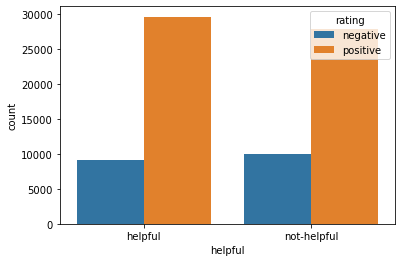

In [99]:
ax = sns.countplot(x="helpful", hue="rating", data=df)

The mix of positive/negative reviews looks pretty balanced across helpful and non-helpful reviews

In [100]:
df['review'] = df['review'].apply(lambda x : remove_tags(x))
df['review'] = df['review'].apply(lambda x : remove_URL(x)) 
df['review'] = df['review'].apply(lambda text: BeautifulSoup(text, 'lxml').get_text())

In [101]:
df.review.replace(r'\s+|\\n', ' ', regex=True, inplace=True)
df.drop(df[df.review == ''].index, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76530 entries, 0 to 76583
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   app_id               76530 non-null  int64         
 1   dlc                  76530 non-null  int64         
 2   recommendationid     76530 non-null  object        
 3   review               76530 non-null  object        
 4   voted_up             76530 non-null  object        
 5   votes_up             76530 non-null  float64       
 6   votes_funny          76530 non-null  float64       
 7   weighted_vote_score  76530 non-null  float64       
 8   review_created       76530 non-null  datetime64[ns]
 9   review_updated       76530 non-null  datetime64[ns]
 10  review_year          76530 non-null  int64         
 11  steamid              76530 non-null  object        
 12  num_games_owned      76530 non-null  int64         
 13  num_reviews          76530 non-

In [103]:
#save data to file
#joblib.dump(df, 'data/clean_dlc_reviews.joblib')
#df=df.to_csv('data/clean_dlc_reviews.csv')